In [17]:
# https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/

(425, 425) (425,) (640, 640)


<Figure size 1152x576 with 0 Axes>

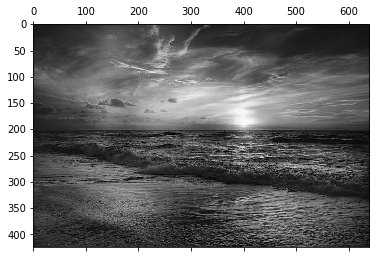

<Figure size 1152x576 with 0 Axes>

In [18]:
# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


# S modificate
import urllib
#req = urllib.urlopen('https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg')
#arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#img = cv2.imdecode(arr, -1) # 'Load it as it is'

from skimage import io    
#img = io.imread("https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg")
#img = io.imread("https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg")
#https://art-assorty.ru/wp-content/uploads/2018/09/beach-2179624_640.jpg
urllib.request.urlretrieve("https://art-assorty.ru/wp-content/uploads/2018/09/beach-2179624_640.jpg", "beach-2179624_640.jpg")
##############

# read image in grayscale
img = cv2.imread('beach-2179624_640.jpg', 0)
#img = cv2.imread(img, 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]
plt.matshow(img, cmap = 'gray')

plt.figure(figsize = (16, 8))
#for i in range(6):
#  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
#  if(i  == 0):
#     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
#  else:
#     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

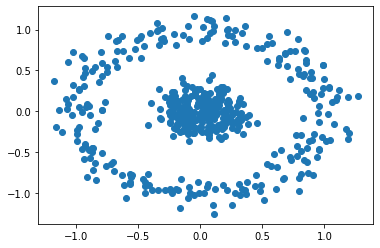

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


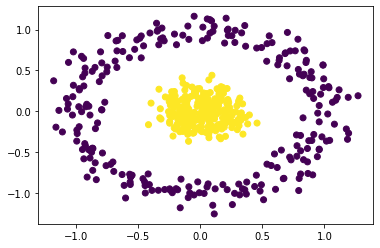

In [19]:
# import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

In [20]:
import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


In [21]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.32331203 -1.80245534]
 [-1.6336216   2.30895658]
 [ 2.14012283  0.64797706]]


In [22]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Left Singular Vectors:
[[-0.25523068 -0.70029483]
 [ 0.94244607 -0.02615889]
 [-0.21599235  0.71337428]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[ 0.71337428 -0.02615889 -0.70029483]
 [ 0.21599235 -0.94244607  0.25523068]]
